In [2]:
import pandas as pd 

In [7]:
df_remuneration= pd.read_table("remuneration.csv",   
                       encoding = 'utf8',       
                       header = 3,              
                       skiprows = [35,36],      
                       sep =','                 
                      )
df_consumption= pd.read_table("consumption.csv",   # 档名
                       encoding = 'utf8',      
                       header = 3,            
                       skiprows = [35,36],      
                       sep =','                 
                      )

In [8]:
def prepare(df_in, l_variable, l_value):
    df = df_in.copy()
    df.columns = [ int(x.replace('年','')) if x!='地区' else x for x in df.columns]
    years = [ x for x in df.columns if x!='地区'] 
    df_out = pd.melt(df, id_vars=['地区'], value_vars=years)
    df_out.columns = ['地区', l_variable, l_value]
    df_out = df_out.set_index(['地区',  l_variable])
    return (df_out)

In [12]:
df_p = prepare(df_remuneration, "年", "remuneration")
df_p

,,remuneration
地区,年,
北京市,2015,12697.30
天津市,2015,6723.99
河北省,2015,15398.55
山西省,2015,6077.62
内蒙古自治区,2015,8797.51
辽宁省,2015,12806.48
吉林省,2015,6124.75
黑龙江省,2015,7090.23
上海市,2015,11085.40


In [13]:
df_p = prepare(df_consumption, "年", "consumption")
df_p 

,,consumption
地区,年,
北京市,2015,8471.40
天津市,2015,4993.12
河北省,2015,9499.11
山西省,2015,5251.42
内蒙古自治区,2015,5225.24
辽宁省,2015,10393.93
吉林省,2015,4027.40
黑龙江省,2015,6304.36
上海市,2015,11089.56


In [14]:
df_p = prepare(df_remuneration, "年", "remuneration").join( prepare(df_consumption, "年", "consumption"), 
                                          how = "left" )
df_p 

,,remuneration,consumption
地区,年,,
北京市,2015,12697.30,8471.40
天津市,2015,6723.99,4993.12
河北省,2015,15398.55,9499.11
山西省,2015,6077.62,5251.42
内蒙古自治区,2015,8797.51,5225.24
辽宁省,2015,12806.48,10393.93
吉林省,2015,6124.75,4027.40
黑龙江省,2015,7090.23,6304.36
上海市,2015,11085.40,11089.56


In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False


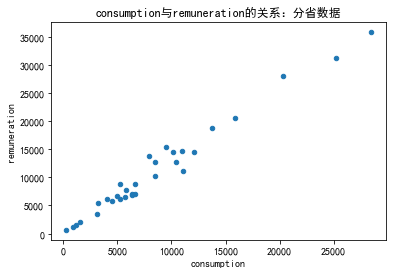

In [16]:
%matplotlib inline
df_p.query("年==2015").plot(kind='scatter', x='consumption', y='remuneration', 
          title = 'consumption与remuneration的关系：分省数据')

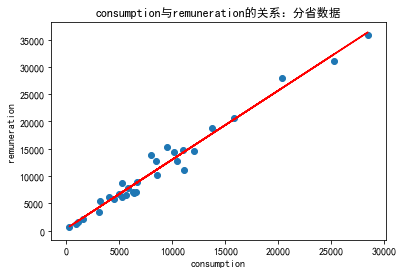

In [17]:
import numpy as np
x = df_p.query("年==2015")['consumption']
y = df_p.query("年==2015")['remuneration']
fit = np.polyfit(x=x , y=y, deg=1)

ax = df_p.query("年==2015").plot(kind='scatter', x='consumption', y='remuneration', 
          title = 'consumption与remuneration的关系：分省数据')
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)

In [18]:
df_p['desc'] = df_p.index.get_level_values(0)

from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import HoverTool, BoxSelectTool

title = '分省数据' 
xlabel = 'consumption:居民消费' 
ylabel = 'remuneration：劳动者报酬'

hover = HoverTool(
    tooltips=[
        ( '居民消费',  '$x{0,F}'), 
        ( '劳动者报酬',  '$y{0,F}'),
        ( '地区',  '@desc'  ),
    ]
)

TOOLS = [hover, "pan, wheel_zoom, box_zoom, reset, resize"]
fig = figure(plot_width=800, plot_height=600,
           x_axis_label = xlabel, y_axis_label = ylabel, 
           title=title, tools=TOOLS)

df_plot = df_p.query("年==2015")

fig.circle("consumption", "remuneration",
         source = df_plot,
         fill_alpha=0.6, line_color=None, size= 15)

#regression line
xs = [min(df_plot["remuneration"]), max(df_plot["consumption"])]
fig.line(x=xs, y=[ fit[0] * x + fit[1] for x in xs] )

output_notebook() 
show(fig)


Loading BokehJS ...

In [19]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, push_notebook, show
from bokeh.models import CustomJS, Slider,HoverTool, BoxSelectTool
from bokeh.layouts import column

title = '分省数据' 
xlabel = 'consumption:居民消费' 
ylabel = 'remuneration：劳动者报酬'
hover = HoverTool(
    tooltips=[
        ( '居民消费',  '$x{0,F}'), 
        ( '劳动者报酬',  '$y{0,F}'),
        ( '地区',  '@desc'  ),
    ]
)

TOOLS = [hover, "pan, wheel_zoom, box_zoom, reset, resize"]

fig = figure(plot_width=800, plot_height=600,
           x_axis_label = xlabel, y_axis_label = ylabel, 
           title=title, tools=TOOLS)

yr_min = df_p.index.get_level_values(1).min()
df_plot = df_p.query("年=={yr}".format(yr=yr_min))
plt = fig.circle("consumption", "remuneration",
         source = df_plot,
         fill_alpha=0.6, line_color=None, size= 15)


def update_plot(year):
    #plt.data_source.data = df_p.query("年=={yr}".format(yr=year))
    plt.data_source.data['consumption'] = list(df_p.query("年=={yr}".format(yr=year)).loc[:,['ge']].iloc[:,0].values)
    plt.data_source.data['remuneration'] = list(df_p.query("年=={yr}".format(yr=year)).loc[:,['pop']].iloc[:,0].values)
    plt.data_source.data['地区_年'] = [(x[0],int(year)) for x in plt.data_source.data['地区_年']]

    push_notebook(handle=bokeh_handle)  
    print (year)

callback = CustomJS(code="""
if (IPython.notebook.kernel !== undefined) {
    var kernel = IPython.notebook.kernel;
    cmd = "update_plot(" + cb_obj.value + ")";
    kernel.execute(cmd, {}, {});
}
""")

slider = Slider(start=df_p.index.get_level_values(1).min(), 
                end=df_p.index.get_level_values(1).max(),
                value=1,
                step=1,
                title="年",
                callback=callback)
output_notebook()

bokeh_handle = show(column(slider, fig), notebook_handle=True)

Loading BokehJS ...

E:\python\lib\site-packages\bokeh\core\json_encoder.py:73: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  if pd and isinstance(obj, pd.tslib.Timestamp):
